In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix,accuracy_score


In [2]:
def label_solution(ph):
    if ph < 7:
        return 0   # Acidic
    elif ph > 7:
        return 1   # Basic
    else:
        return None 




In [3]:
def report(models,y_test):
    for name, pred in models:
        print(f"{name} Report\n{confusion_matrix(y_test,pred)}\n Accuracy:{accuracy_score(y_test,pred)}\n")

# Data Preprocessing

In [4]:
df = pd.read_csv("water_potability.csv")
features = ["pH", "Hardness", "Solids", "Conductivity", "Sulfate"]
df=df.drop(["Potability"],axis=1)
df = df.dropna(subset=["ph"])
df["Acidic/Basic"] = df["ph"].apply(label_solution)
x=  df.drop(["Acidic/Basic","Chloramines","Trihalomethanes","Turbidity","ph"],axis=1)
imputer = SimpleImputer(missing_values=np.nan,strategy="median")
imputer.fit(x)
x = imputer.transform(x)
y = df["Acidic/Basic"]


# Splitting data into Trainnig and Test sets

In [5]:
x_train, x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=0)
sc= StandardScaler()
x_train = sc.fit_transform(x_train)
x_test= sc.transform(x_test)

# Logistic Regression

In [6]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)
log_pred =log_reg.predict(x_test)
log_reg.score(x_test,y_test)

0.5798922800718133

# SVM

In [7]:
svm=SVC(kernel="rbf")
svm.fit(x_train,y_train)
svm_pred=svm.predict(x_test)

# Navie Bayes

In [8]:
bayes = GaussianNB()
bayes.fit(x_train,y_train)
bayes_pred=bayes.predict(x_test)

# K-Nearest Neighbors

In [9]:
knn=KNeighborsClassifier(n_neighbors=5,metric="euclidean")
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)

# Decision Tree

In [10]:
dt=DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
dt_pred=dt.predict(x_test)


# Random Forest

In [11]:
rf =RandomForestClassifier(n_estimators=150)
rf.fit(x_train,y_train)
rf_pred=rf.predict(x_test)
rf.score(x_test,y_test)

0.5565529622980251

In [12]:
prediction =(["LogisticRegression",log_pred],["SVM",svm_pred],["Naive Bayes",bayes_pred],["KNeighborsClassifier",knn_pred],["Decision Tree",dt_pred],["Random Forest",rf_pred])

# Making Report

In [13]:
report(prediction,y_test)

LogisticRegression Report
[[133 152]
 [ 82 190]]
 Accuracy:0.5798922800718133

SVM Report
[[151 134]
 [ 85 187]]
 Accuracy:0.6068222621184919

Naive Bayes Report
[[149 136]
 [ 96 176]]
 Accuracy:0.5834829443447038

KNeighborsClassifier Report
[[135 150]
 [120 152]]
 Accuracy:0.5152603231597845

Decision Tree Report
[[139 146]
 [123 149]]
 Accuracy:0.5170556552962298

Random Forest Report
[[144 141]
 [106 166]]
 Accuracy:0.5565529622980251



In [14]:
import joblib
joblib.dump(log_reg, "acid_base.pkl")


['acid_base.pkl']

In [15]:
dropped_features = ["Chloramines", "Trihalomethanes", "Turbidity","ph"]

selected_features = ["Hardness", "Solids", "Conductivity", "Sulfate","Organic_carbon"]


Feature Selection

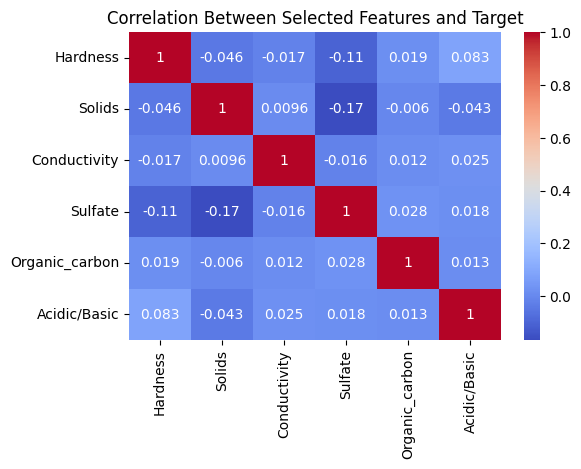

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df[selected_features + ["Acidic/Basic"]].corr()

plt.figure(figsize=(6,4))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Between Selected Features and Target")
plt.show()


In [10]:
from sklearn.datasets import load_iris
df= load_iris()
df["DESCR"]

'.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 150 (50 in each of three classes)\n:Number of Attributes: 4 numeric, predictive attributes and the class\n:Attribute Information:\n    - sepal length in cm\n    - sepal width in cm\n    - petal length in cm\n    - petal width in cm\n    - class:\n            - Iris-Setosa\n            - Iris-Versicolour\n            - Iris-Virginica\n\n:Summary Statistics:\n\n============== ==== ==== ======= ===== ====================\n                Min  Max   Mean    SD   Class Correlation\n============== ==== ==== ======= ===== ====================\nsepal length:   4.3  7.9   5.84   0.83    0.7826\nsepal width:    2.0  4.4   3.05   0.43   -0.4194\npetal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\npetal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n============== ==== ==== ======= ===== ====================\n\n:Missing Attribute Values: None\n:Class Distribution: 

In [16]:
from sklearn.datasets import load_breast_cancer
dataset= load_breast_cancer()
dataset.DESCR

'.. _breast_cancer_dataset:\n\nBreast cancer Wisconsin (diagnostic) dataset\n--------------------------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 569\n\n:Number of Attributes: 30 numeric, predictive attributes and the class\n\n:Attribute Information:\n    - radius (mean of distances from center to points on the perimeter)\n    - texture (standard deviation of gray-scale values)\n    - perimeter\n    - area\n    - smoothness (local variation in radius lengths)\n    - compactness (perimeter^2 / area - 1.0)\n    - concavity (severity of concave portions of the contour)\n    - concave points (number of concave portions of the contour)\n    - symmetry\n    - fractal dimension ("coastline approximation" - 1)\n\n    The mean, standard error, and "worst" or largest (mean of the three\n    worst/largest values) of these features were computed for each image,\n    resulting in 30 features.  For instance, field 0 is Mean Radius, field\n    10 is Radius SE, field 